## Linear Regression

Linear Regression is mainly a statistics tool where we try to find the line that best fits a sample of points , since a line is essentially a curve with equation y = ax+b the best fit line is found by optimizing A such as all the points are the closest to the line .


![alt text](https://i.imgur.com/kI4Tejh.png)

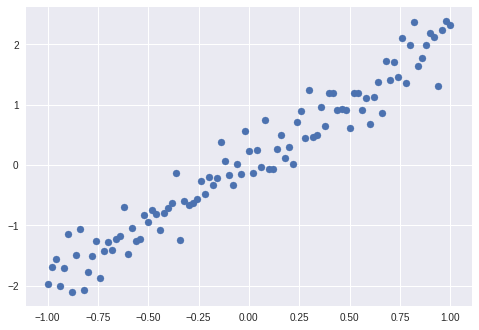

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.linspace(-1,1,101)
Y_train = 2 * X_train + np.random.randn(*X_train.shape) * 0.27
plt.scatter(X_train,Y_train)
plt.show()

In [0]:
# tensorflow will optimize the mean squared error 
# the cost function is defined as the distance between the prediction and the true value for each point all errors squared .
import tensorflow as tf 
from numpy import genfromtxt
from sklearn.datasets import load_boston
LR = 0.01 # learning rate for the optimizer 
EPOCHS = 1000 # number of optimization rounds


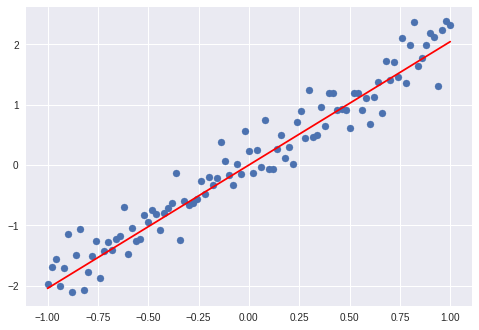

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
  return tf.multiply(X,w)

w = tf.Variable(0.0,name="Weights")

# prediction and cost evaluation
y_predictions = model(X,w)
cost = tf.square(Y-y_predictions)

# training operation
train_ops = tf.train.GradientDescentOptimizer(LR).minimize(cost)

# start session
sess = tf.Session()
# init all variables
init = tf.global_variables_initializer()
# start training
sess.run(init)

for epoch in range(EPOCHS):
  for(x,y) in zip(X_train,Y_train):
    sess.run(train_ops,feed_dict={X:x,Y:y})
    

W_val = sess.run(w)

# close session
sess.close()

# scatter 
plt.scatter(X_train,Y_train)
y_learned = X_train*W_val
plt.plot(X_train,y_learned,'r')
plt.show()

In [6]:
from keras.datasets import boston_housing

Using TensorFlow backend.


MSE: 34.6958


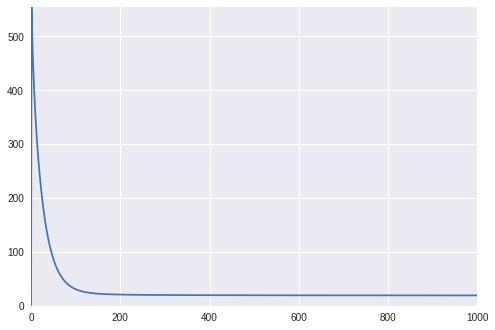

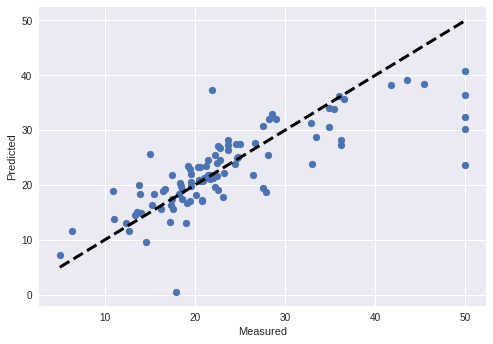

In [29]:

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l
  


features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]


learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()



y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
          
    #calculate mean square error 
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("MSE: %.4f" % sess.run(mse)) 
    
    #plot cost
    plt.plot(range(len(cost_history)),cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()
    
    fig, ax = plt.subplots()
    ax.scatter(test_y, pred_y)
    ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()



In [0]:
# using keras

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [43]:
# building k-fold validation
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #',i)
  val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
  val_target = y_train[i*num_val_samples:(i+1)*num_val_samples]
   # build the first kfold
  partial_x_train = np.concatenate([x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis=0)
  partial_y_train = np.concatenate([y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis=0)
  # build and train the model
  model = build_model()
  model.fit(partial_x_train,partial_y_train,epochs=num_epochs,batch_size=1,verbose=0)
  # evaluate the model
  val_mse,val_mae = model.evaluate(val_data,val_target,verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [1]:
  all_scores

NameError: ignored